# Business Understanding

Microsoft wants to join in on the fun of creating original video content. They created a movie studio but don't 
know where to start therefore they have tasked us with coming up some meaningful insights from some movie data as they want to break into the video content business.

The goal is to translate those insights into data that can help the CEO of Microsoft's new studio to make good business
decisions.

To help them we need to use exploratory data analysis to answer the questions below:

1. What genre of movies are doing good in the market right now?
2. How does the runtime of a movie influence its success?
3. Which genre of movies do good in which regions?
4. What is the best time of year to launch a movie?

 # Data Understanding

For this analysis we will be using data from IMDB that contains information about a movie's genre,title,
production budget,gross revenue and other things.


Data Overview

We first need to look at the data before doing any changes to it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import numpy as np
import seaborn as sns

In [3]:
con = sqlite3.connect('im.db')
pd.read_sql("""
SELECT *
FROM sqlite_master
;""",con)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [4]:
#Load all the data from all the sources

movie_basics = pd.read_sql("""
SELECT *
FROM movie_basics
;""",con)

movie_ratings = pd.read_sql("""
SELECT *
FROM movie_ratings
;""",con)

region_data = pd.read_sql("""
SELECT *
FROM movie_akas
;""",con)
budgets = pd.read_csv('tn.movie_budgets.csv')
display(movie_basics.head(),movie_ratings.head(),region_data.head(),budgets.head())

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [101]:
#Check the data types
display(movie_basics.info(),movie_ratings.info(),region_data.info(),budgets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entri

None

None

None

None

All the required datasets have been chosen for their relevance to the project and to help us answer the questions we had above and therefore help us make good business recommendations.

# Data Preparation

In [5]:
# Getting the data together
movie_imdb = movie_basics.merge(movie_ratings, how = 'right', on='movie_id')
movie_imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
1,tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
2,tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
3,tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
4,tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21
...,...,...,...,...,...,...,...,...
73851,tt9805820,Caisa,Caisa,2018,84.0,Documentary,8.1,25
73852,tt9844256,Code Geass: Lelouch of the Rebellion - Glorifi...,Code Geass: Lelouch of the Rebellion Episode III,2018,120.0,"Action,Animation,Sci-Fi",7.5,24
73853,tt9851050,Sisters,Sisters,2019,NaN,"Action,Drama",4.7,14
73854,tt9886934,The Projectionist,The Projectionist,2019,81.0,Documentary,7.0,5


In [6]:
#Checking for missing data
movie_imdb.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [7]:
#Fill missing genre data with none
movie_imdb['genres'].fillna('None', inplace=True)
movie_imdb.isna().sum()


movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres                0
averagerating         0
numvotes              0
dtype: int64

In [9]:
budgets['production_budget'] = budgets['production_budget'].str[1:].replace(',','',regex=True).astype(int)
budgets['domestic_gross'] = budgets['domestic_gross'].str[1:].replace(',','',regex=True).astype(int)
budgets['worldwide_gross'] = budgets['worldwide_gross'].str[1:].replace(',','',regex=True).astype(int)

In [10]:
#Check for missing data entries
#Check for any 0 values where there are supposed to be integers  
budgets[budgets['production_budget'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [11]:
budgets[budgets['domestic_gross'] == 0]
budgets[budgets['worldwide_gross'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,"Dec 31, 2020",Moonfall,150000000,0,0
479,80,"Dec 13, 2017",Bright,90000000,0,0
480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0
670,71,"Aug 30, 2019",PLAYMOBIL,75000000,0,0
...,...,...,...,...,...,...
5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,72,"May 19, 2015",Family Motocross,10000,0,0
5777,78,"Dec 31, 2018",Red 11,7000,0,0


In [12]:
#There are a  lot of 0's that we don't care for so let's remove those rows
#There is no missing data in production budget.
budgets['domestic_gross'] = budgets['domestic_gross'].apply(lambda x: np.nan if x==0 else x)
budgets['worldwide_gross'] = budgets['worldwide_gross'].apply(lambda x: np.nan if x==0 else x)

In [13]:
budgets[budgets['domestic_gross'] == 0]
budgets[budgets['worldwide_gross'] == 0]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


In [14]:
#All the 0 values have been turned to NaN values so let's drop those values
budgets = budgets[budgets['domestic_gross'].notna()]

In [16]:
#Now lets merge the two dataframes to create one useful dataframe
final_df= budgets.merge(movie_imdb, how='left',right_on=['original_title'], left_on=['movie'])

In [18]:
#Let us filter out the rows that are NaN for the relevant columns
final_df = final_df[final_df['averagerating'].notna()].sort_values('release_date')
final_df['averagerating'].isna().sum()

0

In [19]:
final_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
293,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0
4686,43,"Apr 1, 2011",Trust,4000000,120016.0,120016.0,tt8779022,Trust,Trust,2018.0,100.0,"Crime,Drama",6.4,30.0
5134,63,"Apr 1, 2011",Insidious,1500000,54009150.0,99870886.0,tt1591095,Insidious,Insidious,2010.0,103.0,"Horror,Mystery,Thriller",6.9,254197.0
4947,34,"Apr 1, 2011",Super,2500000,327716.0,593933.0,tt1512235,Super,Super,2010.0,96.0,"Action,Comedy,Drama",6.8,70604.0
4946,34,"Apr 1, 2011",Super,2500000,327716.0,593933.0,tt1807022,Super,Super,2010.0,140.0,Drama,8.1,1869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,85,"Sep 9, 2016",When the Bough Breaks,10000000,29747603.0,30768449.0,tt1389139,When the Bough Breaks,When the Bough Breaks,2016.0,107.0,"Crime,Drama,Horror",5.1,4729.0
899,50,"Sep 9, 2016",Sully,60000000,125070033.0,238524556.0,tt3263904,Sully,Sully,2016.0,96.0,"Biography,Drama",7.5,202718.0
3280,30,"Sep 9, 2016",The Disappointments Room,15000000,2423467.0,3503761.0,tt2364897,The Disappointments Room,The Disappointments Room,2016.0,85.0,"Drama,Horror,Thriller",3.9,8167.0
3438,88,"Sep 9, 2016",Robinson Crusoe,13000000,8005586.0,42446455.0,tt4731008,The Wild Life,Robinson Crusoe,2016.0,91.0,"Adventure,Animation,Comedy",5.4,5042.0


In [20]:
#check for duplication
final_df.duplicated(subset=['movie','release_date'], keep=False).sum()

710

In [19]:
#Dropping values based on numvotes
final_df.sort_values('numvotes', ascending=False)
final_df.drop_duplicates(subset=['movie','release_date'], keep=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
2530,78,2010,You Again,20000000,25702053.0,32838945.0,tt1414382,You Again,You Again,2010.0,105.0,"Comedy,Family,Romance",5.8,46690.0
2501,49,2010,Vampires Suck,20000000,36661504.0,81424988.0,tt1666186,Vampires Suck,Vampires Suck,2010.0,82.0,Comedy,3.4,43984.0
2467,16,2010,Why Did I Get Married Too?,20000000,60095852.0,60831067.0,tt1391137,Why Did I Get Married Too?,Why Did I Get Married Too?,2010.0,121.0,"Comedy,Drama,Romance",4.6,8653.0
2466,15,2010,The Last Song,20000000,62950384.0,92678948.0,tt1294226,The Last Song,The Last Song,2010.0,107.0,"Drama,Music,Romance",6.0,74914.0
2449,98,2010,Jackass 3D,20000000,117229692.0,171685793.0,tt1116184,Jackass 3D,Jackass 3D,2010.0,95.0,"Action,Comedy,Documentary",7.0,53289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,24,2019,Alita: Battle Angel,170000000,85710210.0,402976036.0,tt0437086,Alita: Battle Angel,Alita: Battle Angel,2019.0,122.0,"Action,Adventure,Sci-Fi",7.5,88207.0
126,25,2019,Godzilla: King of the Monsters,170000000,85576941.0,299276941.0,tt3741700,Godzilla: King of the Monsters,Godzilla: King of the Monsters,2019.0,132.0,"Action,Adventure,Fantasy",6.7,36479.0
2439,88,2019,Us,20000000,175006930.0,254210310.0,tt6857112,Us,Us,2019.0,116.0,"Horror,Mystery,Thriller",7.1,102511.0
2472,21,2019,What Men Want,20000000,54611903.0,69911903.0,tt7634968,What Men Want,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",4.9,10141.0


In [21]:
final_df['gross_profit'] = final_df['domestic_gross']+final_df['worldwide_gross'] -final_df['production_budget']
final_df['profit_percentage'] = (final_df['gross_profit'] / final_df['production_budget'])*100

In [22]:
final_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,gross_profit,profit_percentage
293,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821
4686,43,"Apr 1, 2011",Trust,4000000,120016.0,120016.0,tt8779022,Trust,Trust,2018.0,100.0,"Crime,Drama",6.4,30.0,-3759968.0,-93.999200
5134,63,"Apr 1, 2011",Insidious,1500000,54009150.0,99870886.0,tt1591095,Insidious,Insidious,2010.0,103.0,"Horror,Mystery,Thriller",6.9,254197.0,152380036.0,10158.669067
4947,34,"Apr 1, 2011",Super,2500000,327716.0,593933.0,tt1512235,Super,Super,2010.0,96.0,"Action,Comedy,Drama",6.8,70604.0,-1578351.0,-63.134040
4946,34,"Apr 1, 2011",Super,2500000,327716.0,593933.0,tt1807022,Super,Super,2010.0,140.0,Drama,8.1,1869.0,-1578351.0,-63.134040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,85,"Sep 9, 2016",When the Bough Breaks,10000000,29747603.0,30768449.0,tt1389139,When the Bough Breaks,When the Bough Breaks,2016.0,107.0,"Crime,Drama,Horror",5.1,4729.0,50516052.0,505.160520
899,50,"Sep 9, 2016",Sully,60000000,125070033.0,238524556.0,tt3263904,Sully,Sully,2016.0,96.0,"Biography,Drama",7.5,202718.0,303594589.0,505.990982
3280,30,"Sep 9, 2016",The Disappointments Room,15000000,2423467.0,3503761.0,tt2364897,The Disappointments Room,The Disappointments Room,2016.0,85.0,"Drama,Horror,Thriller",3.9,8167.0,-9072772.0,-60.485147
3438,88,"Sep 9, 2016",Robinson Crusoe,13000000,8005586.0,42446455.0,tt4731008,The Wild Life,Robinson Crusoe,2016.0,91.0,"Adventure,Animation,Comedy",5.4,5042.0,37452041.0,288.092623


In [24]:
final_df['new_genres'] = final_df['genres'].str.split(',')
final_df = final_df.explode('new_genres')
final_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,gross_profit,profit_percentage,new_genres
293,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821,Action
293,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821,Adventure
293,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821,Fantasy
4686,43,"Apr 1, 2011",Trust,4000000,120016.0,120016.0,tt8779022,Trust,Trust,2018.0,100.0,"Crime,Drama",6.4,30.0,-3759968.0,-93.999200,Crime
4686,43,"Apr 1, 2011",Trust,4000000,120016.0,120016.0,tt8779022,Trust,Trust,2018.0,100.0,"Crime,Drama",6.4,30.0,-3759968.0,-93.999200,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3438,88,"Sep 9, 2016",Robinson Crusoe,13000000,8005586.0,42446455.0,tt4731008,The Wild Life,Robinson Crusoe,2016.0,91.0,"Adventure,Animation,Comedy",5.4,5042.0,37452041.0,288.092623,Adventure
3438,88,"Sep 9, 2016",Robinson Crusoe,13000000,8005586.0,42446455.0,tt4731008,The Wild Life,Robinson Crusoe,2016.0,91.0,"Adventure,Animation,Comedy",5.4,5042.0,37452041.0,288.092623,Animation
3438,88,"Sep 9, 2016",Robinson Crusoe,13000000,8005586.0,42446455.0,tt4731008,The Wild Life,Robinson Crusoe,2016.0,91.0,"Adventure,Animation,Comedy",5.4,5042.0,37452041.0,288.092623,Comedy
3883,13,"Sep 9, 2016",Kicks,10000000,150191.0,150191.0,tt4254584,Kicks,Kicks,2016.0,80.0,"Adventure,Drama",6.3,3789.0,-9699618.0,-96.996180,Adventure


In [63]:
selected_columns = ['new_genres','averagerating','gross_profit','profit_percentage','production_budget','runtime_minutes','numvotes','release_date']
v_df = final_df[selected_columns].copy()
v_df

,new_genres,averagerating,gross_profit,profit_percentage,production_budget,runtime_minutes,numvotes,release_date
293,Action,5.8,531429776.0,425.143821,125000000,106.0,256176.0,"Apr 1, 2010"
293,Adventure,5.8,531429776.0,425.143821,125000000,106.0,256176.0,"Apr 1, 2010"
293,Fantasy,5.8,531429776.0,425.143821,125000000,106.0,256176.0,"Apr 1, 2010"
4686,Crime,6.4,-3759968.0,-93.999200,4000000,100.0,30.0,"Apr 1, 2011"
4686,Drama,6.4,-3759968.0,-93.999200,4000000,100.0,30.0,"Apr 1, 2011"
...,...,...,...,...,...,...,...,...
3438,Adventure,5.4,37452041.0,288.092623,13000000,91.0,5042.0,"Sep 9, 2016"
3438,Animation,5.4,37452041.0,288.092623,13000000,91.0,5042.0,"Sep 9, 2016"
3438,Comedy,5.4,37452041.0,288.092623,13000000,91.0,5042.0,"Sep 9, 2016"
3883,Adventure,6.3,-9699618.0,-96.996180,10000000,80.0,3789.0,"Sep 9, 2016"


In [26]:
v_df.dropna(subset = 'runtime_minutes',inplace=True)

In [130]:
v_df = v_df[v_df['new_genres'] != 'None']

In [131]:
#To answer the first question We will use the genre 
v1_df = v_df.groupby('new_genres').mean()[['profit_percentage','production_budget','gross_profit','runtime_minutes']].sort_values(['gross_profit','production_budget'],ascending=[False,True]).reset_index().head(10)

/tmp/ipykernel_186252/1095982519.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  v1_df = v_df.groupby('new_genres').mean()[['profit_percentage','production_budget','gross_profit','runtime_minutes']].sort_values(['gross_profit','production_budget'],ascending=[False,True]).reset_index().head(10)


In [132]:
# The ratings are next
r = ['new_genres','averagerating']
h_df = v_df[r]
h_df = h_df.groupby('new_genres').mean('averagerating').sort_values('averagerating', ascending=False).reset_index()

In [134]:
#Prep for visualization
v1_df['gross_profit'] = v1_df['gross_profit'] / 1000000
v1_df['production_budget'] = v1_df['production_budget'] / 1000000

In [135]:
#Parameters for plotting
gen = v1_df['new_genres']
profits = v1_df['gross_profit']
budget = v1_df['production_budget']


In [141]:
#Parameters for plotting rating
x = h_df['new_genres']
y = h_df['averagerating']
h_df

,new_genres,averagerating
0,Documentary,7.090323
1,Biography,6.990449
2,History,6.780000
3,Western,6.750000
4,News,6.700000
5,Musical,6.676471
6,Animation,6.616216
7,Sport,6.611111
8,War,6.523333
9,Drama,6.515217


# Visualizing Question 1

This can be done using two metrics.
Using the ratings of the movies and the profits that each movie has generated

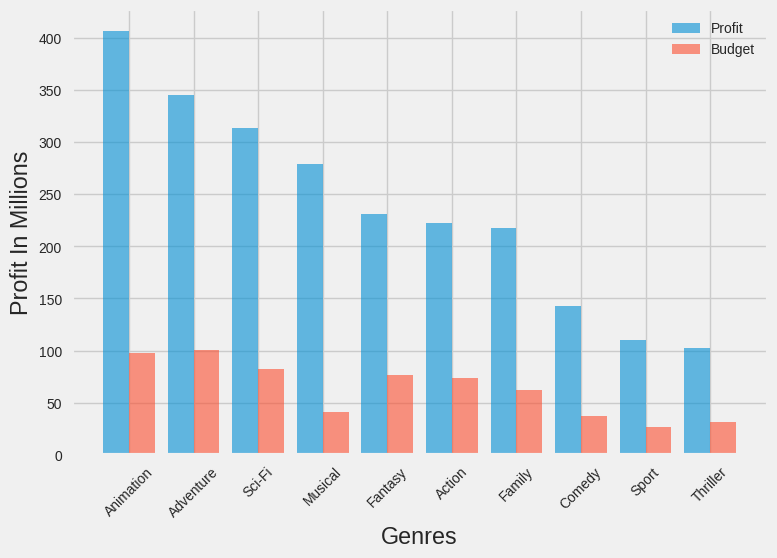

In [121]:
#Visualizations
gen_indices = np.arange(len(gen))
bar_width = 0.4
#Bar Chart
fig,ax = plt.subplots()
ax.bar(gen_indices, profits, width=bar_width, align='center',alpha=0.6,label='Profit')
ax.bar(gen_indices+bar_width, budget, width=bar_width,align='center',alpha=0.6,label='Budget')

ax.set_xticks(gen_indices+bar_width / 2)
ax.set_xticklabels(gen,rotation=45);
ax.set_xlabel('Genres')
ax.set_ylabel('Profit In Millions')
plt.style.use('seaborn')
plt.legend(loc='best');

The Chart above shows that the genres have created a profit on the budget they had although some better than others.
It also shows that despite some genres having a lower budget than others, they still made their studios a better profit.

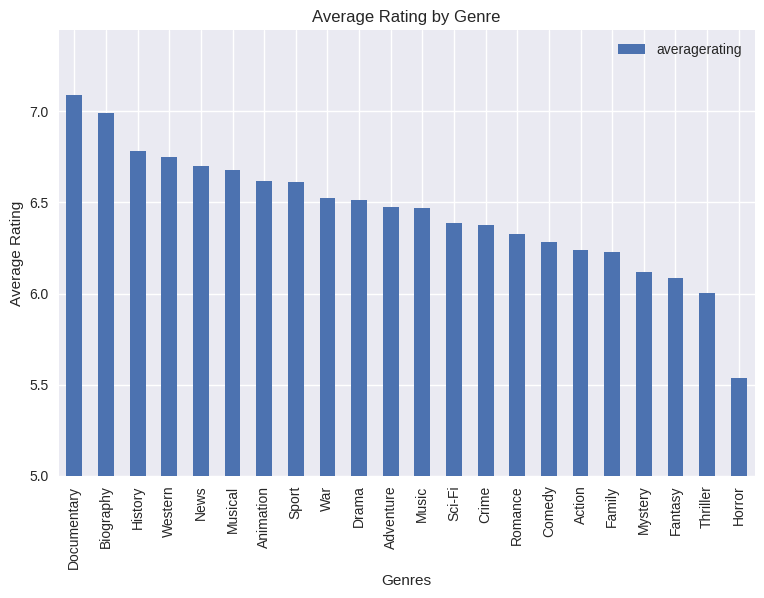

In [145]:
h_df.plot.bar(x='new_genres', y='averagerating')
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title('Average Rating by Genre')
plt.xticks(rotation=90)
plt.ylim(5, None)
# Display the chart
plt.style.use('seaborn')
plt.show()


The chart shows the genres and their ratings

# QUESTION 2

In [35]:
v_df

,new_genres,averagerating,gross_profit,profit_percentage,production_budget,runtime_minutes,numvotes
293,Action,5.8,531429776.0,425.143821,125000000,106.0,256176.0
293,Adventure,5.8,531429776.0,425.143821,125000000,106.0,256176.0
293,Fantasy,5.8,531429776.0,425.143821,125000000,106.0,256176.0
4686,Crime,6.4,-3759968.0,-93.999200,4000000,100.0,30.0
4686,Drama,6.4,-3759968.0,-93.999200,4000000,100.0,30.0
...,...,...,...,...,...,...,...
3438,Adventure,5.4,37452041.0,288.092623,13000000,91.0,5042.0
3438,Animation,5.4,37452041.0,288.092623,13000000,91.0,5042.0
3438,Comedy,5.4,37452041.0,288.092623,13000000,91.0,5042.0
3883,Adventure,6.3,-9699618.0,-96.996180,10000000,80.0,3789.0


In [47]:
cols = ['averagerating','runtime_minutes']
v2_df = v_df[cols]
v2_df

,averagerating,runtime_minutes
293,5.8,106.0
293,5.8,106.0
293,5.8,106.0
4686,6.4,100.0
4686,6.4,100.0
...,...,...
3438,5.4,91.0
3438,5.4,91.0
3438,5.4,91.0
3883,6.3,80.0


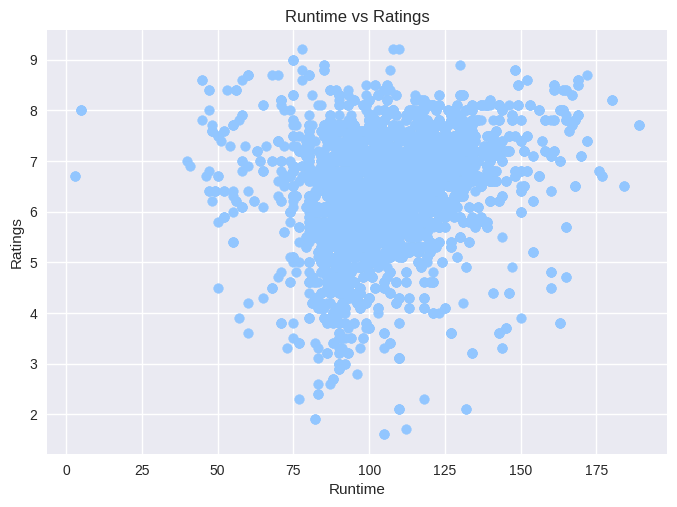

In [106]:
fig,ax = plt.subplots()
ax.scatter(v2_df['runtime_minutes'], v2_df['averagerating'])
ax.set_title("Runtime vs Ratings")
ax.set_xlabel("Runtime")
ax.set_ylabel('Ratings');
plt.style.use('fivethirtyeight')

This shows that runtime of the most popular movies is ususally between 80-120 minutes.

# QUESTION 3

In [49]:
columns = ['movie_id','title','region']
region_data = region_data[columns]
region_data

,movie_id,title,region
0,tt0369610,Джурасик свят,BG
1,tt0369610,Jurashikku warudo,JP
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR
3,tt0369610,O Mundo dos Dinossauros,BR
4,tt0369610,Jurassic World,FR
...,...,...,...
331698,tt9827784,Sayonara kuchibiru,None
331699,tt9827784,Farewell Song,XWW
331700,tt9880178,La atención,None
331701,tt9880178,La atención,ES


In [50]:
r_df = final_df.merge(region_data, on='movie_id')
r_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,gross_profit,profit_percentage,new_genres,title,region
0,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821,Action,Titanu susidurimas,LT
1,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821,Action,Titanu cina,LV
2,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821,Action,Η τιτανομαχία,GR
3,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821,Action,Borba Titana,RS
4,72,"Apr 1, 2010",Clash of the Titans,125000000,163214888.0,493214888.0,tt0800320,Clash of the Titans,Clash of the Titans,2010.0,106.0,"Action,Adventure,Fantasy",5.8,256176.0,531429776.0,425.143821,Action,Súboj Titanov,SK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108834,13,"Sep 9, 2016",Kicks,10000000,150191.0,150191.0,tt4254584,Kicks,Kicks,2016.0,80.0,"Adventure,Drama",6.3,3789.0,-9699618.0,-96.996180,Drama,Ayakkabilar,TR
108835,13,"Sep 9, 2016",Kicks,10000000,150191.0,150191.0,tt4254584,Kicks,Kicks,2016.0,80.0,"Adventure,Drama",6.3,3789.0,-9699618.0,-96.996180,Drama,Kiksy,PL
108836,13,"Sep 9, 2016",Kicks,10000000,150191.0,150191.0,tt4254584,Kicks,Kicks,2016.0,80.0,"Adventure,Drama",6.3,3789.0,-9699618.0,-96.996180,Drama,Kicks,US
108837,13,"Sep 9, 2016",Kicks,10000000,150191.0,150191.0,tt4254584,Kicks,Kicks,2016.0,80.0,"Adventure,Drama",6.3,3789.0,-9699618.0,-96.996180,Drama,Kicks,None


In [51]:
r_df.dropna(subset='region',inplace=True)
r_df['region'].isna().sum()

0

In [52]:
r_df['region'].unique()

array(['LT', 'LV', 'GR', 'RS', 'SK', 'HU', 'IL', 'AR', 'PL', 'DE', 'BG',
       'JP', 'MX', 'EE', 'RU', 'PE', 'CA', 'RO', 'HR', 'GE', 'PT', 'FR',
       'FI', 'IN', 'TR', 'UA', 'US', 'ES', 'BR', 'IT', 'CZ', 'DK', 'BA',
       'VN', 'UY', 'LU', 'CL', 'VE', 'NO', 'CO', 'SE', 'KR', 'SI', 'AU',
       'BE', 'CH', 'GB', 'XWW', 'IS', 'PR', 'IE', 'NL', 'CN', 'MY', 'PH',
       'IR', 'AL', 'SG', 'AZ', 'TW', 'AE', 'ID', 'AT', 'HK', 'TH', 'EC',
       'PA', 'BO', 'XSA', 'LK', 'NZ', 'ZA', 'EG', 'XAS', 'CM', 'PY', 'CR',
       'KZ', 'MN', 'XEU', 'MK', 'JM', 'BD', 'KW', 'AW', 'DO', 'GT', 'SV',
       'LB', 'MC', 'NP', 'IQ', 'MA', 'BT', 'CU', 'XKO', 'MD', 'MT', 'LI',
       'AM', 'CI', 'DZ', 'TN', 'SUHH', 'XYU'], dtype=object)

In [53]:
r_df.drop_duplicates(subset=['region'],inplace=True)

In [54]:
r_df.duplicated(subset='region',keep=False).sum()

0

In [55]:
col = ['new_genres','region','averagerating','gross_profit']
r_df = r_df[col]
r_df

,new_genres,region,averagerating,gross_profit
0,Action,LT,5.8,531429776.0
1,Action,LV,5.8,531429776.0
2,Action,GR,5.8,531429776.0
3,Action,RS,5.8,531429776.0
4,Action,SK,5.8,531429776.0
...,...,...,...,...
94341,Adventure,CI,8.0,775705106.0
94628,Crime,DZ,5.1,14896911.0
95710,Horror,TN,4.6,86256498.0
96552,Drama,SUHH,6.7,6873791.0


In [56]:
#Make the gross_profit column readable
r_df['gross_profit'] = r_df['gross_profit'] / 100000

/tmp/ipykernel_186252/1671113061.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df['gross_profit'] = r_df['gross_profit'] / 100000


In [57]:
top_states_by_genre = r_df.groupby(['new_genres']).apply(lambda x: x.nlargest(10, 'gross_profit')).reset_index(drop=True)

In [58]:
top_states_by_genre

,new_genres,region,averagerating,gross_profit
0,Action,BD,7.1,13219.56447
1,Action,CN,6.7,12106.11032
2,Action,MY,6.7,12106.11032
3,Action,PH,6.7,12106.11032
4,Action,IR,6.7,12106.11032
5,Action,TH,7.3,7151.94779
6,Action,LT,5.8,5314.29776
7,Action,LV,5.8,5314.29776
8,Action,GR,5.8,5314.29776
9,Action,RS,5.8,5314.29776


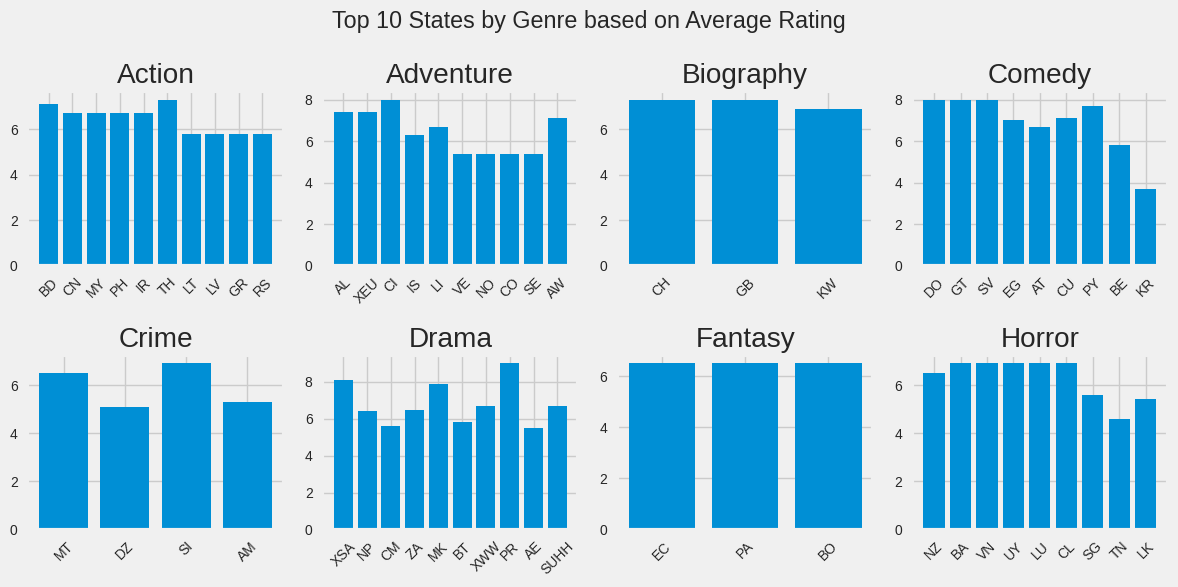

In [147]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6), tight_layout=True)
for i, (genre, ax) in enumerate(zip(top_states_by_genre['new_genres'].unique(), axs.flatten())):
    # Filter the data for the current genre
    genre_data = top_states_by_genre[top_states_by_genre['new_genres'] == genre]
    
    # Create the bar chart
    ax.bar(genre_data['region'], genre_data['averagerating'])
    
    # Set the title for the subplot
    ax.set_title(genre)
    
    # Rotate the x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)

# Set the overall title for the subplots
fig.suptitle('Top 10 States by Genre based on Average Rating')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5)

plt.style.use("fivethirtyeight")
# Display the subplots
plt.show()


The Charts above show the top 10 states for each genre.
This will help us in making a good business recommendation.

# QUESTION 4 

In [64]:
v_df

,new_genres,averagerating,gross_profit,profit_percentage,production_budget,runtime_minutes,numvotes,release_date
293,Action,5.8,531429776.0,425.143821,125000000,106.0,256176.0,"Apr 1, 2010"
293,Adventure,5.8,531429776.0,425.143821,125000000,106.0,256176.0,"Apr 1, 2010"
293,Fantasy,5.8,531429776.0,425.143821,125000000,106.0,256176.0,"Apr 1, 2010"
4686,Crime,6.4,-3759968.0,-93.999200,4000000,100.0,30.0,"Apr 1, 2011"
4686,Drama,6.4,-3759968.0,-93.999200,4000000,100.0,30.0,"Apr 1, 2011"
...,...,...,...,...,...,...,...,...
3438,Adventure,5.4,37452041.0,288.092623,13000000,91.0,5042.0,"Sep 9, 2016"
3438,Animation,5.4,37452041.0,288.092623,13000000,91.0,5042.0,"Sep 9, 2016"
3438,Comedy,5.4,37452041.0,288.092623,13000000,91.0,5042.0,"Sep 9, 2016"
3883,Adventure,6.3,-9699618.0,-96.996180,10000000,80.0,3789.0,"Sep 9, 2016"


In [84]:
c = ['release_date','gross_profit','new_genres']
v4_df = v_df[c]

In [85]:
#Check for missing values
v4_df.isna().sum()

release_date    0
gross_profit    0
new_genres      0
dtype: int64

In [86]:
#Drop duplicates
v4_df.drop_duplicates(inplace=True)
v4_df

/tmp/ipykernel_186252/3367184626.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v4_df.drop_duplicates(inplace=True)


,release_date,gross_profit,new_genres
293,"Apr 1, 2010",531429776.0,Action
293,"Apr 1, 2010",531429776.0,Adventure
293,"Apr 1, 2010",531429776.0,Fantasy
4686,"Apr 1, 2011",-3759968.0,Crime
4686,"Apr 1, 2011",-3759968.0,Drama
...,...,...,...
3438,"Sep 9, 2016",37452041.0,Adventure
3438,"Sep 9, 2016",37452041.0,Animation
3438,"Sep 9, 2016",37452041.0,Comedy
3883,"Sep 9, 2016",-9699618.0,Adventure


In [92]:
v4_df['release_date'] = pd.to_datetime(v4_df['release_date'])
v4_df['thirds'] = pd.cut(v4_df['release_date'].dt.month, bins=[1, 4, 8, 12], labels=['Jan-Apr', 'May-Aug', 'Sep-Dec'])

/tmp/ipykernel_186252/2583807343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v4_df['release_date'] = pd.to_datetime(v4_df['release_date'])
/tmp/ipykernel_186252/2583807343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v4_df['thirds'] = pd.cut(v4_df['release_date'].dt.month, bins=[1, 4, 8, 12], labels=['Jan-Apr', 'May-Aug', 'Sep-Dec'])


In [91]:
#Make gross profit chartable
v4_df['gross_profit'] = v4_df['gross_profit']/100000

/tmp/ipykernel_186252/3498138873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v4_df['gross_profit'] = v4_df['gross_profit']/100000


In [97]:
thirdly_profit = v4_df.groupby('thirds')['gross_profit'].mean()
thirdly_profit

thirds
Jan-Apr    1359.601300
May-Aug    1928.513678
Sep-Dec    1327.629799
Name: gross_profit, dtype: float64

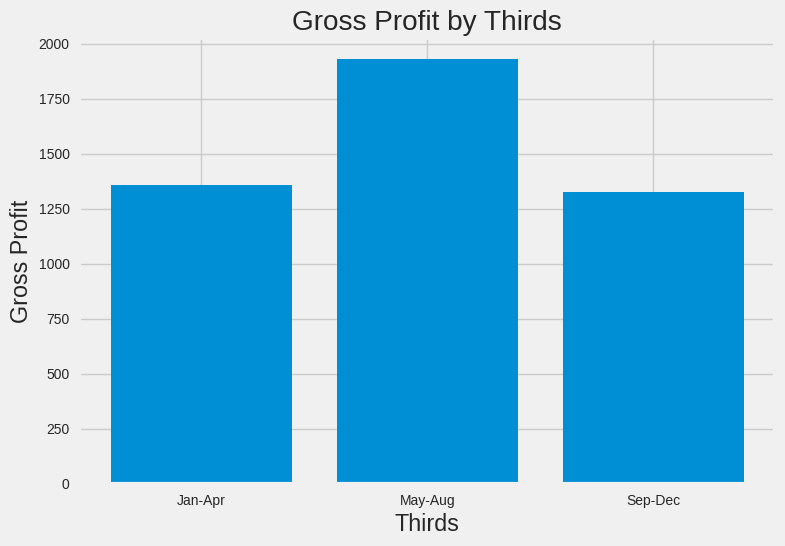

In [108]:
#Plot the chart
plt.bar(thirdly_profit.index, thirdly_profit.values)

# Set axis labels and title
plt.xlabel('Thirds')
plt.ylabel('Gross Profit')
plt.title('Gross Profit by Thirds')

# Display the chart
plt.show()

The Chart above shows that the best time to launch a movie would be from May-Aug

 # Conclusions

There are a lot of factors that contribute to a movie's success that being said the data analysis above shows that given Microsoft is just starting out in the industry it should focus on the best genres that bring in the highest revenue for example Animation,Adventure,Sci-Fi etc but they should also not sleep on the highest rated genres i.e the genres that the audience loves most so as to gain some traction in the industry.

Also, the studio should try to keep the audience in a movie as a long movie becomes too much for the audience to handle.
As the analysis showed they should keep it between 90-120 minutes to keep the audience engaged.

The studio to gain an international audience should focus on the best genres that people like there thereby increasing its worldwide audience. The analysis showed that different genres performed well in different regions thereby confirming the hypothesis.

Lastly, the studio should focus on specific times to release times that generate the most revenue and the analysis showed that the best time to launch a movie is between May to August.

Although there is no one size fits all solution to creating a good movie studio that turns over a good profit since there are many factors involved, the analysis above leads me to recommend four things:
Firstly that Microsoft focus on genres that return a good profit on a regular basis for example animation,adventure and also to not count out some genres that have a low production budget but turn over a huge profit like for exampe musicals.
Also to gain a footing with the audience Microsoft should also focus on the high rated genres 

Secondly, the studio needs to realize that people get bored and tired after a while so the movie shouldn't be too long so the analysis found out that the highest rated movies are usually between 80-120 minutes.

Thirdly, considering that money is not a problem for microsoft the analyses revealed what genres typically do well in which regions for example the region AL takes well to adventure movies as for comedy movies not too much.
All the genres and ehuich regions they do well in is shown using a visualization.

Lastly, as it is best for a new studio to continue on the set trends of the market, the analysis found out that the period between May to August is the best time to release a movie.